# Exercise 2.1 - Logistic Regression
This notebook covers my solutions to Andrew Ng's Machine Learning course Exercise 2 - Logistic Regression.

In this exercise, logistic regression is used to predict the probability of university admission based on two exam scores.

I'll start with importing the data.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and examine data
path = os.path.join(os.getcwd(), 'data', 'ex2data1.txt')
data = pd.read_csv(path, header=None, names=['Exam 1 Score','Exam 2 Score','Admitted'])
data.head()

,Exam 1 Score,Exam 2 Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualising
Now, I plot the data with the exam scores on the x and y axes displaying markers for successful and non successful admittance.

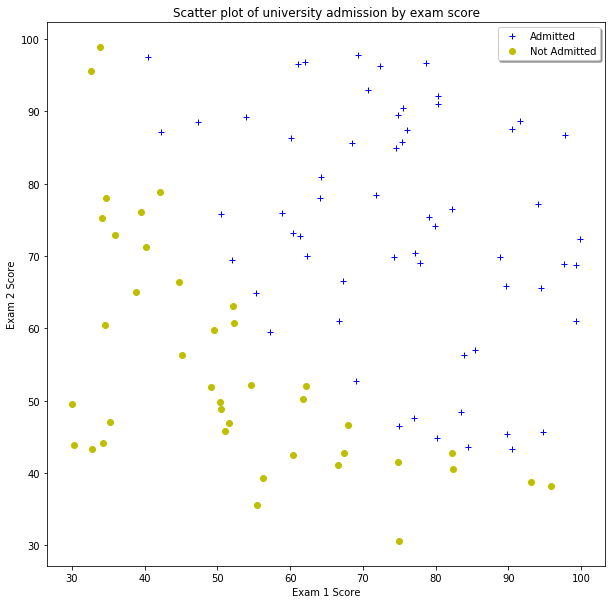

In [19]:
plt.figure(figsize=(10,10))
plt.plot(data.loc[data['Admitted'] == 1, 'Exam 1 Score'], 
         data.loc[data['Admitted'] == 1, 'Exam 2 Score'], 
         'b+', label='Admitted')
plt.plot(data.loc[data['Admitted'] == 0, 'Exam 1 Score'], 
         data.loc[data['Admitted'] == 0, 'Exam 2 Score'], 
         'yo', label='Not Admitted')
plt.legend(loc='upper right', shadow=True)
plt.title('Scatter plot of university admission by exam score')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

Now, let's separate the data into the $X$ and $y$ matrices, adding the column of ones for $\theta_0$

In [31]:
# Separate the feature set from the result parameter
m, n = data.shape
X = np.matrix(data.iloc[:,0:(n-1)])
X = np.concatenate((np.ones((m, 1)), X), axis=1)
y = np.matrix(data.iloc[:,(n-1)]).T

## Sigmoid Function
The hypothesis for a logistic regression learning algorithm is defined as:

$$ h_\theta(x) = g(\theta^Tx) $$

Where $g(z)$ is the sigmoid function:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

In [23]:
def sigmoid(z):
    """ Performs the sigmoid function element-wise over the matrix z """
    
    return 1/(1+np.exp(-z))

Test the sigmoid function with an array of linearly spaced values centred around $0$

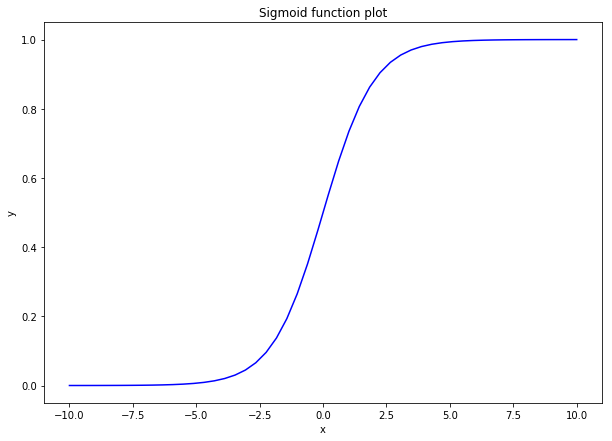

In [30]:
xvals = np.linspace(-10.0, 10.0, num = 50)
yvals = sigmoid(xvals)
plt.figure(figsize=(10,7))
plt.plot(xvals, yvals, 'b-')
plt.title('Sigmoid function plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The sigmoid function above approaches $1$ for large positive $x$ and approaches $0$ for large negative $x$ as expected. When $x = 0$, the sigmoid function is $0.5$

## Cost Function and Gradient
Now we implement the cost function and gradient for logistic regression.

The cost function is defined as:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}\text{log}(h_\theta(x^{(i)})) - (1-y^{(i)})\text{log}(1-h_\theta(x^{(i)}))] $$


In [ ]:
def costFunction(theta, X, y):
    """ Compute the cost and gradient for logistic regression """
    
    # Initialise some values
    m = y.size
    J = 0
    grad = np.zeros(theta.size)
    
    
    
    return J, grad